
 
 ***Pro1- Diamonds*** 

A1-The maximum rate for a diamond is $18,823 

A2-The avg rate for a diamond is $3,932 

A3-There are 21,551 Ideal cut diamonds 

A4-There are 7 colors of diamonds and they are called: ['D' 'E' 'F' 'G' 'H' 'I' 'J'] 

A5-The avg Carat size for a Premium diamond is 0.89 carat 

A6- The Avg Carat size for each diamond Cut 


 A6-1.  The avg Carat size of each Cut is represented with numbers,
 The grey line in the boxes represents the median Carat size for each Cut 

 A6-2.  The distribution each Cut and Carat,
 The white line represents the median Carat size for each Cut
*I have cleand the data from diamonds above 1.8 Carat, the subtraction affect on the mean and median is minor 
 Number of with Carat size greater than 1.8 is-> 2274 
 Number of with Carat size smaller than 1.8 is-> 51645 



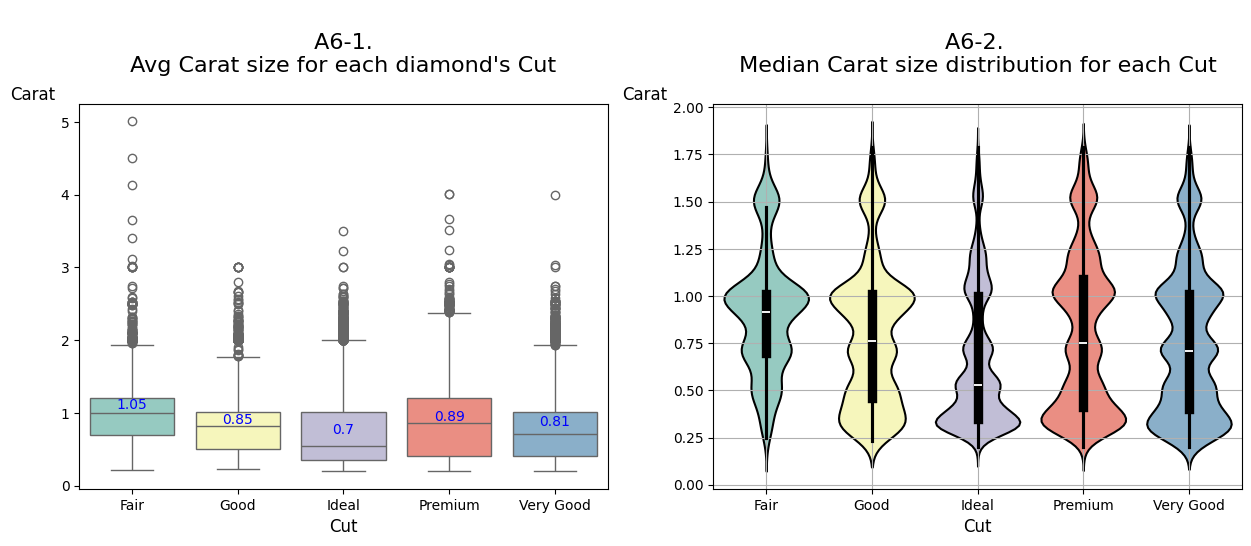


 A7-1. The Avg Price for each Color in numbers,
 The Median Price is the grey line


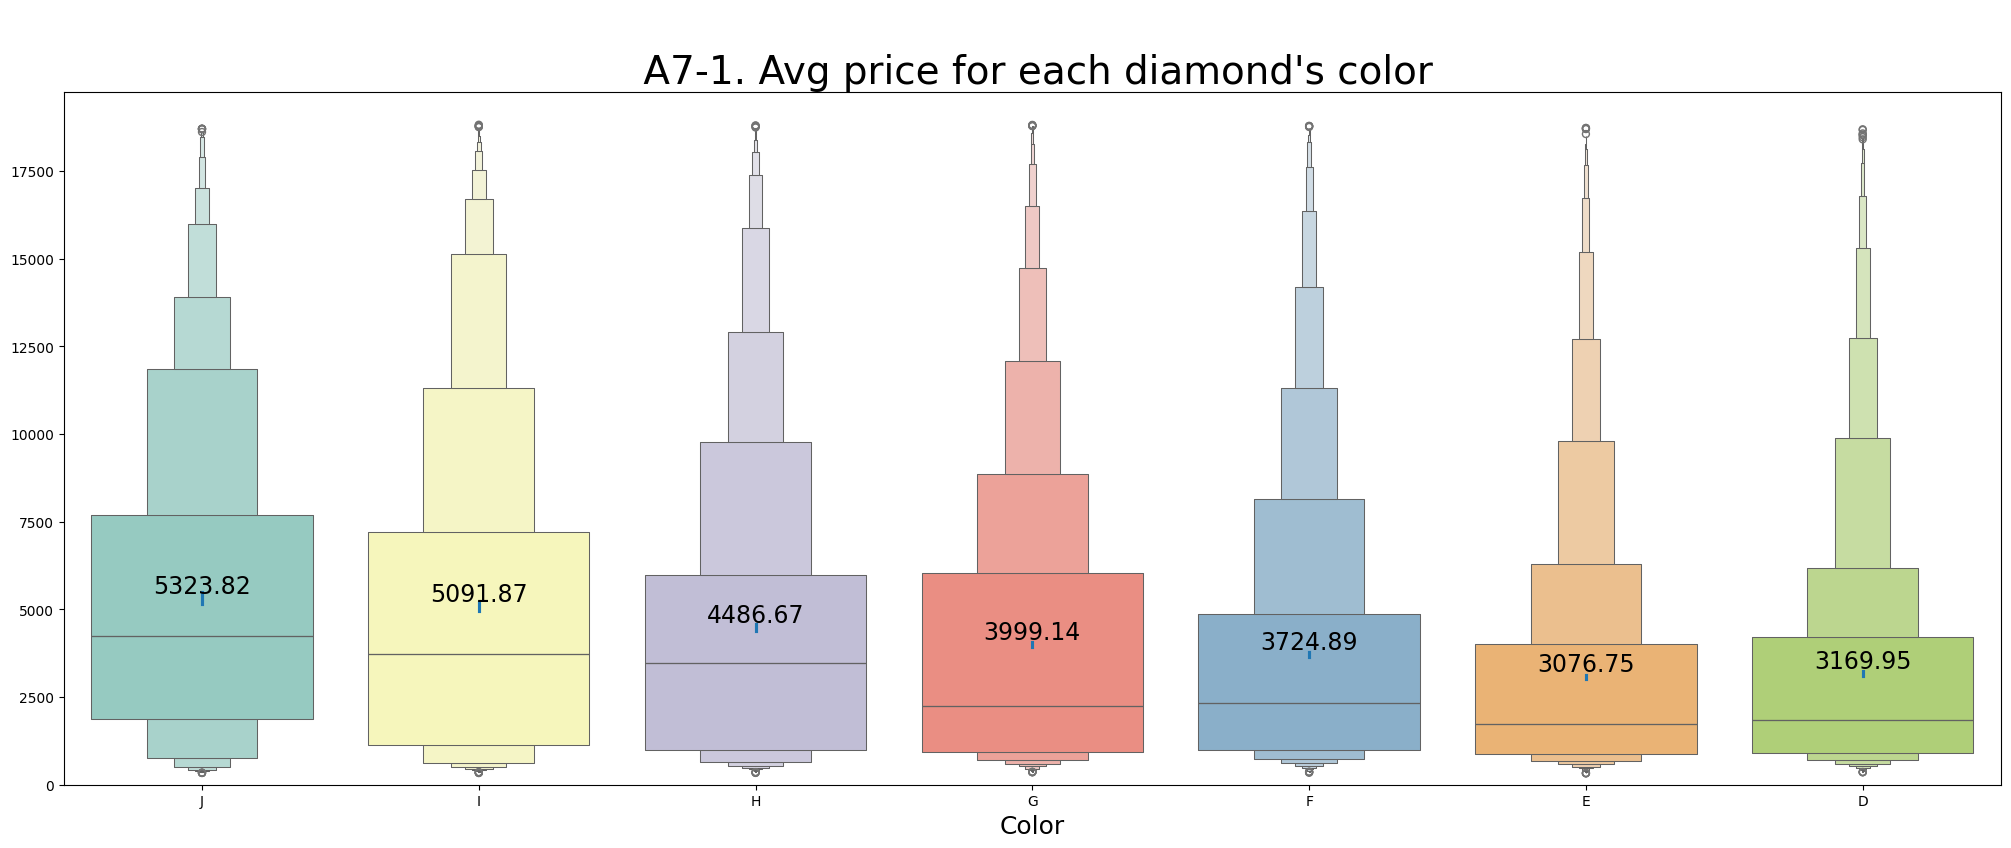


 A7-2. The Avg Price for each Color % ,



<Figure size 2500x900 with 0 Axes>

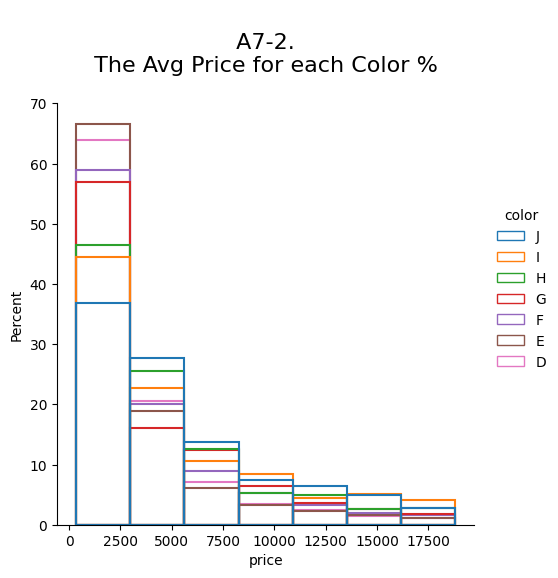


 A7-3. As shown below- Though Color, Cut and Carat affect the diamonds price the Clarity is crutial 
 and can be the diffrance of thousends of dollars from VVS-Very very slightly included to Il-Included
Conclusion 1-Color D is the most valuable Color, then E,F,G,H,I,J.
Conclusion 2- Color, Clarity & Cut affects the price rather then Carat size


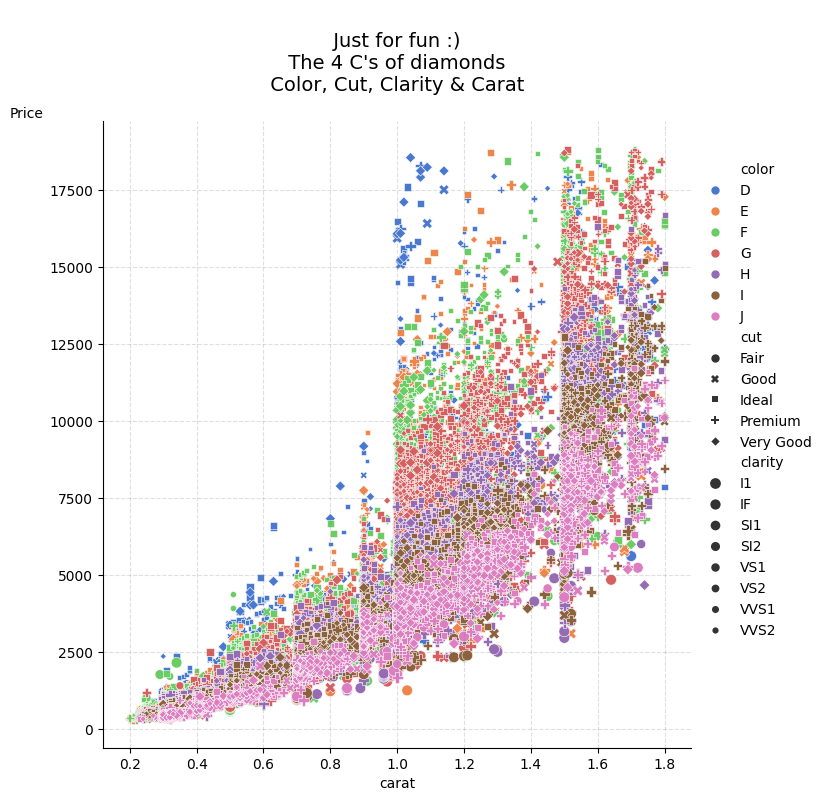

In [2]:
# Project 1
# Table of contents:
# Diamonds dataset


# imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import pandasql as psql
import seaborn as sb
import xlrd as xl
import openpyxl
import pyodbc as pyb
from matplotlib import pyplot
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
from random import randint
import numpy
from IPython.display import display


print('\n \n ***Pro1- Diamonds*** \n')
#Part 2- Diamonds stock
#import diamonds dataset and save in df
# **adjust location if necessary**
df=sb.load_dataset('datasets\\diamonds')

#Q1 max rate for a diamond?
#save max price to df1
df1=df.price.max()
#format number with comma
df1="{:,}".format(df1)
#print answer
print('A1-The maximum rate for a diamond is','$'+df1,'\n')

#Q2 avg rate for a diamond?
#save avg price to df2
df2=int(df.price.mean())
#format number with comma
df2="{:,}".format(df2)
#print answer
print('A2-The avg rate for a diamond is','$'+df2,'\n')

#Q3 how many diamods in cut Ideal
#save len of ideal cut to df3
df3=len(df.query("cut=='Ideal'"))
#format number with comma
df3="{:,}".format(df3)
#print answer
print('A3-There are',df3,'Ideal cut diamonds','\n')

#Q4 how many diamonds colors and what are their names?
#save the number of unique colors to df4
df4=df.color.nunique()
#save & sort the names of unique colors to df41
df41=df.color.sort_values().unique()
#print answer
print('A4-There are',df4,'colors of diamonds and they are called:',df41,'\n')

#Q5 what is the avg of premium diamonds
#save premium sut to df
df5=df.query("cut=='Premium'")
# save sum and count
s=df5['carat'].sum()
c=df5['carat'].count()
# divide sum and count for avg
avg=s/c
#print answer
print('A5-The avg Carat size for a Premium diamond is',round(avg,2),'carat','\n')
#df5.groupby('cut')['carat'].mean()   # test
#df5.groupby('cut')['carat'].median() # test

#Q6 what is the average carat for each cut?
# print anwer
print('A6- The Avg Carat size for each diamond Cut \n')
# save columns carat & cut to df6
df6=df[["carat","cut","price"]].sort_values('cut')
# create sub-plot
pyplot.figure(figsize=(15,5))
# add 1st subplot
pyplot.subplot(1,2,1)
# add 1st boxplot
df6Bar=sb.boxplot(y='carat',x='cut',data=df6,palette="Set3",hue='cut')
# save & round  mean labels
lab=round(df6.groupby('cut')['carat'].agg('mean'),2)
 # for some reason it gives me a future warning and asks me to pass False in mean..
# display the labels above boxes
ver=df6['carat'].agg('mean')*0.01
for xtick in df6Bar.get_xticks():
    df6Bar.text(xtick,lab.iloc[(xtick)]+ver,lab.iloc[(xtick)],horizontalalignment='center',size=10,color='b')
# add the 1st plot labels & title to plot
pyplot.ylabel('Carat',fontsize=12,rotation=0,loc="top")
pyplot.xlabel('Cut',fontsize=12)
pyplot.title('\n A6-1. \n Avg Carat size for each diamond\'s Cut \n',fontsize=16)
# print answer
print('\n A6-1.  The avg Carat size of each Cut is represented with numbers,\n The grey line in the boxes represents the median Carat size for each Cut \n')

# select diamonds with less than 1.8 carat doesn't affect results but gives better graphics
df61=df6.query("carat<1.8")
countBig=df6[df6['carat'] > 1.8]['cut'].count()
countSmall=df6[df6['carat'] < 1.8]['cut'].count()
# add 2nd barplot to answer
pyplot.subplot(1,2,2)
df62Bar=sb.violinplot(y='carat',x='cut',data=df61,linewidth=1.5, linecolor="k",palette="Set3",hue='cut')
# add the 2st plot labels & title to plot
pyplot.ylabel('Carat',fontsize=12,rotation=0,loc="top")
pyplot.xlabel('Cut',fontsize=12)
df62Bar.set_xticks(['Ideal','Premium','Very Good','Good','Fair'])
pyplot.title('\nA6-2. \n Median Carat size distribution for each Cut \n',fontsize=16)
# add grid to 2nd plot
pyplot.grid(True)
print(' A6-2.  The distribution each Cut and Carat,\n The white line represents the median Carat size for each Cut')
print("*I have cleand the data from diamonds above 1.8 Carat, the subtraction affect on the mean and median is minor \n Number of with Carat size greater than 1.8 is->",countBig,"\n Number of with Carat size smaller than 1.8 is->",countSmall,'\n')
pyplot.show()

#Q7 what is the average price for each color
print('\n A7-1. The Avg Price for each Color in numbers,\n The Median Price is the grey line')
df7=df[["price","color","cut","carat","clarity"]].sort_values(['color','cut','clarity'],ascending=False)
pyplot.figure(figsize=(25,9))
df7Bar=sb.barplot(x='color',y='price',data=df7, fill=False,linewidth=0)
#add the bar values
df7Bar.bar_label(df7Bar.containers[0],fontsize=17)
#add the boxen plot on top off bar plot- apperntly it works 
df7Bar=sb.boxenplot(x='color',y='price',data=df7,palette="Set3",hue='color')
#add the 1st plot labels and title
pyplot.title('\n A7-1. \n The Avg Price for each Color \n',fontsize=16)
pyplot.xlabel('Color',fontsize=18)
pyplot.ylabel('')
pyplot.title('\n A7-1. Avg price for each diamond\'s color',fontsize=28)
pyplot.show()

#create 2rd plot 
print('\n A7-2. The Avg Price for each Color % ,\n')
pyplot.figure(figsize=(25,9))
sb.displot(df7, x="price", hue="color", stat="percent",common_norm=False,bins=7,fill=False)
#'count', 'density', 'percent', 'probability' or 'frequency'
pyplot.title('\n A7-2. \n The Avg Price for each Color % \n',fontsize=16)
pyplot.show()

#create 3rd plot- The 4C'- Cut, Carat, Color & Clarity 
print('\n A7-3. As shown below- Though Color, Cut and Carat affect the diamonds price the Clarity is crutial \n and can be the diffrance of thousends of dollars from VVS-Very very slightly included to Il-Included')
print('Conclusion 1-Color D is the most valuable Color, then E,F,G,H,I,J.')
print('Conclusion 2- Color, Clarity & Cut affects the price rather then Carat size')
df7=df[["price","color","cut","carat","clarity"]].sort_values(['color','cut','clarity'],ascending=True)
df7=psql.sqldf("select * from df7 where carat<=1.8;",globals())
df7Bar = sb.relplot(data=df7,x='carat', y='price', hue='color', size='clarity',style="cut",sizes=(20,60), palette='muted',height=7)
pyplot.grid(True,linestyle='--',color='grey', alpha=.25)
pyplot.ylabel('Price',rotation=0,loc="top")
pyplot.title('\n Just for fun :) \n The 4 C\'s of diamonds \n Color, Cut, Clarity & Carat \n ',fontsize=14)
pyplot.show()


#test
#df72=round(df7.groupby('color')['price'].agg(['mean','median','std']),0)
#df72